<a href="https://colab.research.google.com/github/christinecoconnor/ML-Final-Project/blob/main/Final_Project_Submission_DRAFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Instructions**

This document is a template, and you are not required to follow it exactly. However, the kinds of questions we ask here are the kinds of questions we want you to focus on. While you might have answered similar questions to these in your project presentations, we want you to go into a lot more detail in this write-up; you can refer to the Lab homeworks for ideas on how to present your data or results. 

You don't have to answer every question in this template, but you should answer roughly this many questions. Your answers to such questions should be paragraph-length, not just a bullet point. You likely still have questions of your own -- that's okay! We want you to convey what you've learned, how you've learned it, and demonstrate that the content from the course has influenced how you've thought about this project.

# Project Name: Predicting Dementia Severity from MRI Images
Project mentor: Aditya Chattopadhyay

Alexadra Mo <ymo6@jh.edu>, Ellie Zhang <ezhang18@jh.edu>, Christine O'Connor <coconn20@jh.edu>

Git Repository: https://github.com/christinecoconnor/ML-Final-Project


# Outline and Deliverables 

List the deliverables from your project proposal. For each uncompleted deliverable, please include a sentence or two on why you weren't able to complete it (e.g. "decided to use an existing implementation instead" or "ran out of time"). For each completed deliverable, indicate which section of this notebook covers what you did.

If you spent substantial time on any aspects that weren't deliverables in your proposal, please list those under "Additional Work" and indicate where in the notebook you discuss them.

### Uncompleted Deliverables
1. **"Be able to construct the CNN AlexNet structure clearly (Must accomplish #1)":** we decided to use our own structure for the CNN rather than an existing structure because we felt it would let us learn more about the fundamentals of CNN structure and would give us more freedom to try different structures of the network.
2. **"Be able to have a very good (low) test error for real-world deployment (Expect to accomplish #1)":** 
3. **"Pre-train the model with auto-encoder for feature extraction or denoising (Would like to accomplish #1)":** we decided to use the tf.keras.preprocessing.image_dataset_from_directory command to do our preprocessing because there were many options for preprocessing (e.g. grayscaling) that we could choose, and it would help our code be more consistent as we were taking advantage of the keras package for most of our implementation. Because of this, we chose not to implement an autoencoder as a preprocessing step.
4. **"Optimize the running time of the training time for the model (Would like to accomplish #2)":** we implemented some optimization/train time reduction methods such as Adam optimization, the prefetch commands, and decreased image resolution, but we feel there is still more work we could do on researching other methods to speed up our model. Therefore, we consider this deliverable to be partially but not fully complete.
5. **"Increase the sensitivity of the model’s prediction to above 90 (Would like to accomplish #3)":** we did not manage to have a test sensitivity (recall score) above 90. Our best performing model reached a recall score of 0.6826. This may have been due to the way we structured our network or tuned our hyperparameters (filter size, etc.), but would require further analysis/time to understand.

### Completed Deliverables
1. **"Be able to implement an optimal loss function and optimization method for parameter tuning (Must accomplish #2)":** We discuss loss function and optimization in Experimental Setup.
2. **"Be able to predict Alzheimer’s/dementia severity better than chance (accuracy of at least 55) (Must accomplish #4)":** We discuss results, including accuracy, in the Results section below.
3. **"Accomplish prediction accuracy of at least 60 (Expect to accomplish #2)":** We discuss results, including accuracy, in the Results section below.
4. **"Accomplish prediction sensitivity of at least 60 (Expect to accomplish #3)":** We discuss results, including sensitivity, in the Results section below.


### Additional Deliverables
1. We decided to try a few different configurations for the CNN we implemented, including comparisons of network shallowness. We discuss these comparisons in the Results section below.
2. We decided to use two baselines: one for clinical diagnostic accuracy and one for predictive accuracy using a machine learning model based on the same MRI dataset. We discuss this in the Baselines section below.

# Preliminaries 

## What problem were you trying to solve or understand? (Proposal)

**What are the real-world implications of this data and task?**
Alzheimer's is the most common form of late-life dementia and is projected to affect about 15 million Americans by 2060 (Ana de Barros). Current diagnostic methods usually involve numerous different tests, including blood tests, MRI scans, and symptom evaluation. An improved diagnostic test could simplify this process so that patients can receiver a quicker and more accurate diagnosis. Earlier and more accurate Alzheimer's diagnosis that include the severity of a patient's dementia can result in improved patient care and disease management, ultimately enabling a patient to receive better resources and have an improved quality of life.

**How is this problem similar to others we’ve seen in lectures, breakouts, and homeworks?**
We have seen image classification and processing problems including identification different numbers and arabic numerals. Our project is similar in that it involves image classification and processing, albeit in a more healthcare related setting.

**What makes this problem unique?**
Machine learning in healthcare is still a new and upcoming field in AI research. As the age of technology is progressing, the potential of using machine learning algorithms in healthcare is becoming more and more recognized. The problem of Alzheimer's dignosis is unique because there is currently no one test to diagnose and predict dementia severity. There are some phsyiololgical signs within the brain that may indicate dementia, so using a machine learning algorithm to identify these patterns with higher accuracy than a clinician could be invaluable to this diagnostic field.


**What ethical implications does this problem have?**
As this project aims to target a problem with real-world healthcare applications, machine learning explainability and interpretability must be considered. In the case where this algorithm is used in real clinical settings, a physician may not trust a model that merely states its prediction without giving reasons or indications for how it reached that conclusion. Since the consequences of an Alzheimer's diagnosis can be life-altering for patients, the model must be easily interpreted for the physician to trust its predictions and feel confident in informing the patient on how and why they got their diagnosis.

## Dataset(s)

**Describe the dataset(s) you used.** For our project, there were a total of 6400 images belonging to 4 classes: non-demented (2560 train + 640 test), very mildly demented (1792 train + 448 test), mildly demented (717 train + 179 test), and moderately demented (52 train + test).

**How were they collected?**
The data was collected using MRI scans to generate images for healthy and dementia patients.

**Why did you choose them?**
We chose this dataset because there were large number of examples and we were interested in the potential applications we could develop by using this data.


**How many examples in each?**
The class distribution was described above. We also split the data into training and testing sets, with 4097 examples for training, 1024 for validation, and 1279 for testing.


In [ ]:
# Load your data and print 2-3 examples

import tensorflow as tf
import matplotlib.pyplot as plt

IMAGE_SIZE = [176, 208]

data = tf.keras.preprocessing.image_dataset_from_directory(
    '/Users/ellie/Downloads/Alzheimer_s Dataset/train/',
    seed = 1,
    image_size = [176, 208],

)


Found 5121 files belonging to 4 classes.


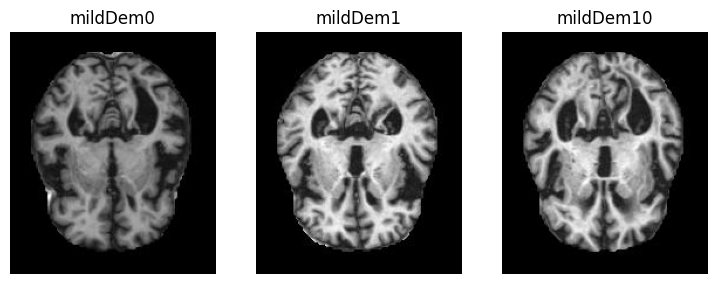

In [ ]:
# printing examples
import matplotlib.pyplot as plt
from matplotlib.image import imread


def display_img(image_name):
    path = '/Users/ellie/Downloads/Alzheimer_s Dataset/train/MildDemented'
    title = 'mildDem' + image_name
    plt.title(title)
    plt.imshow(imread(path + '/' + title +'.jpg'))
    plt.axis("off")


plt.figure(figsize = (9,8))

# display first image
plt.subplot(1,3,1)
display_img('0')

# display second image
plt.subplot(1,3,2)
display_img('1')

# display third
plt.subplot(1,3,3)
display_img('10')


## Pre-processing

**What features did you use or choose not to use? Why?**
As our project used image data, we did not incorporate feature selection. Each pixel was part of the input feature set.

**If you have categorical labels, were your datasets class-balanced?**
Our datasets were not class-balanced; the majority of the dataset was part of the "Non-demented" healthy brain class.

**How did you deal with missing data? What about outliers?**
To deal with the non-balanced data, we tried incorporating **weighted cross entropy loss** to compensate for the missing data.

**What approach(es) did you use to pre-process your data? Why?**
To pre-process our data, we used the keras package from the tensorflow library. The specific function we used was: tf.keras.preprocessing.image_dataset_from_directory(). This function allowed efficient extraction of the image datasets from local directories and had numerous parameters in which we could control our pre-processing settings. The main thing we controlled for was the color-mode of the images. We set color_mode = 'grayscale' instead of rgb because using just one color channel for the image data allowed for more efficient model training because we did not have access to a GPU when running our model.

**Are your features continuous or categorical? How do you treat these features differently?**
The features are continous because they are pixels that are initially RGB values, but were then converted to grayscale. The features were all treated the same before being input into the model.

In [ ]:
# For those same examples above, what do they look like after being pre-processed?

#Preprocessing the training data:
train = tf.keras.preprocessing.image_dataset_from_directory(
    '/Users/ellie/Downloads/Alzheimer_s Dataset/train/',
    labels = 'inferred',
    seed = 13,
    color_mode = "grayscale", # this converts 3 channel to one channel
    image_size = [208, 176],
    shuffle = False
    #batch_size=32
)

Found 5121 files belonging to 4 classes.


Since the image data already looked like it was in black and white, preprocessing the data and changing the channels from 3 to 1 channels using the "grayscale" setting for the color_mode parameter did not change the visual output we see for the preprocessed data below. However, making this change did allow us to train our model more quickly.

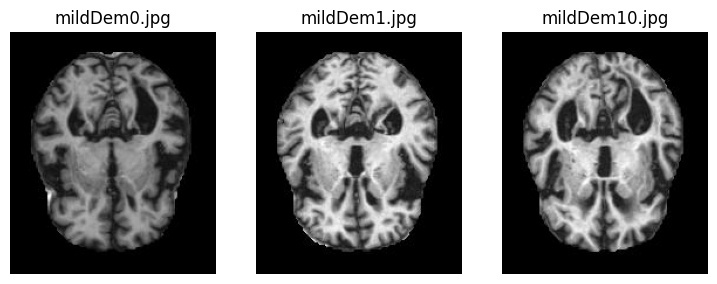

In [ ]:
# Visualize the distribution of your data before and after pre-processing.
# You may borrow from how we visualized data in the Lab homeworks.

#displaying training data:
plt.figure(figsize = (9,8))

for image, labels in list(train.as_numpy_iterator())[:1]:
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.title(train.file_paths[i][62:]) 
    plt.imshow(image[i].astype("uint8"))
    plt.axis("off")
  

# Models and Evaluation 

## Experimental Setup

**How did you evaluate your methods? Why is that a reasonable evaluation metric for the task?**

We evaluated our model's train and test accuracy as well as its sensitivity (recall score). We measured recall score because having a better recall score means that we are avoiding false negatives. It is important to avoid false negatives for diagnosis of debilitating conditions like Alzheimer's because every time the model predicts non-demented in a case where someone is very mild, mild, or moderate demented, this could result in missing their cases and delaying/missing treatment. In general, for medical diagnosis, a high recall score is usually better because it is more important to identify all cases of a disease than to ensure that all diagnoses are accurate.

**What did you use for your loss function to train your models? Did you try multiple loss functions? Why or why not?**

We first started out using keras's CategoricalCrossentropy loss function because in class we learned about how the cross entropy loss function is a good loss function for CNNs. It lets the model output a probability for each class, which can be used to create more nuanced predictions than if the model only outputs a single class. Cross entropy loss punishes the model more for being confident about a wrong prediction than for being unsure about a correct prediction.

After our presentation, Aditya suggested we use weighted cross entropy loss because of our class imbalance (e.g. there are more non-demented than moderate demented, so moderate demented would be weighted higher), so we used a weighted cross entropy loss implementation from an online resource. This has the benefits of cross entropy loss while also accounting for the class imbalances.

**How did you split your data into train and test sets? Why?**
    
Our dataset already contained directories of train vs. test images, so we followed the split that it came with. Within the train set, we used a validation split of 0.2 because 80/20 is a common split between train/validation sets that we have also used previously in the class.


In [ ]:
# Code for loss functions, evaluation metrics or link to Git repo
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras import backend as K

"""
    A weighted version of keras.objectives.categorical_crossentropy
    We found this function from an online resource: https://gist.github.com/wassname/ce364fddfc8a025bfab4348cf5de852d
    
    Variables:
        weights: numpy array of shape (C,) where C is the number of classes
    
    Usage:
        weights = np.array([4, 50, 1, 1.4]) -> our own weights
        Class one at 4, class 2 50x the normal weights, class 4 1.4x (due to data imbalance).
        loss = weighted_categorical_crossentropy(weights)
        model.compile(loss=loss,optimizer='adam')
"""
def weighted_categorical_crossentropy(weights):
    
    weights = K.variable(weights)
        
    def loss(y_true, y_pred):
        # scale predictions so that the class probas of each sample sum to 1
        y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
        # clip to prevent NaN's and Inf's
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
        # calculate loss
        loss = y_true * K.log(y_pred) * weights
        loss = -K.sum(loss, -1)
        return loss
    
    return loss

# setting the weights for weighted cross entropy
weights = np.array([4, 50, 1, 1.4])

# our metrics: 
Metrics = [tf.keras.metrics.AUC(name='auc'), 
           tf.keras.metrics.CategoricalAccuracy(name="cat acc"), 
           tf.keras.metrics.Recall(name="recall")]

## Baselines 

**What baselines did you compare against? Why are these reasonable?**

“The diagnostic accuracy is 77% for a clinical diagnosis of AD, even among experts” (Sabbagh et al): We used this baseline because our model would ideally work better than current systems in place if it was to be implemented in medical settings. This baseline describes the diagnostic accuracy with the current methods of diagnosis (including medical experts who are performing the diagnoses), so it is a good basis for comparison with our project.

95% accuracy on certain MRI datasets (Fu’adah et al): This baseline would allow us to compare our model with other work on the same MRI image data for Alzheimer's patients, as this paper describes the performance of a model on predicting dementia severity level from MRI scans. Since this paper is using the same dataset, we can more easily compare how good our network structure is.


**Did you look at related work to contextualize how others methods or baselines have performed on this dataset/task? If so, how did those methods do?**

We were able to find related work performing dementia severity predictions on the same MRI scan dataset that we were using. This model had a high performance, with an accuracy of 95% and an average recall score of 0.9555.

## Methods

**What methods did you choose? Why did you choose them?**

We chose to use a convolutional neural network because we learned in class that this type of network is good for image classification. This is because they can reduce the dimensionality of the input data without losing important information, and extract information of the features from the input images.
Within the CNN, we use convolutional layers, fully connected (dense) layers, and max pooling layers, as well as dropout layers for regularization. The convolutional layers apply a learnable filter to the input data and extract local features from it. The max pooling layers help reduce the dimensionality of the inputs because they retain the maximum value of each region. The dense layers are layers where all the neurons are connected to the ones in the previous layer allow the model to learn complex relationships; we add these after we have used some convolutional layers because they help the model identify the more high-level features. 

We chose to try both a deeper (6 hidden layers) and a shallower (4 hidden layers) network because it would allow us to compare the results of having more convolutional layers in the network.

**How did you train these methods, and how did you evaluate them? Why?**

We trained the network with the directory of train images, and also had a validation split within the train directory. During training, we printed the loss, area under the curve, accuracy, and recall score for the train and validation subsets. We also print these metrics for the test set after each epoch.

We evaluated the model mainly based on the accuracy and recall score. This is because knowing the accuracy told us how well the model predicts correct values, and knowing the recall score told us how well the model was able to identify positive cases (this is important for us because in medical diagnosis, the cost of false negatives tends to be higher than the cost of false positives, so we want a higher recall score).

**Which methods were easy/difficult to implement and train? Why?**

The CNN itself was less difficult to implement than we expected because we found that the keras package has many built-in functions that can help us preprocess data, build our model, and output information on the model. However, we found we had to spend some extra effort on understanding/deciding how we structure the layers because, for example, we learned that we should not be decreasing and then increasing the filter size for the convolutional layer. Based on our research, we tried to go from a smaller filter to a larger one, our thought process being that the earlier layers are responsible for capturing low-level features, while the later layers can combine these features to recognize higher-level patterns in the data. We reasoned at this point that using larger filters earlier on could cause information to be lost, while using smaller filters in the later layers could cause the network to miss other important patterns in the data. However, during our presentation feedback, Aditya told us we should be going from large filter sizes to small ones. Therefore, we re-ran our model with this change and found it performed slightly better, so we kept this as our final structure.

**For each method, what hyperparameters did you evaluate? How sensitive was your model's performance to different hyperparameter settings?**

Our hyperparameters for the CNN were mainly the filter sizes. Tuning them entailed changing the filter sizes within the network, such as the small to large/large to small filter sizes described in the previous point. We found these changes did affect our accuracy/recall scores by a few percent values, and kept the one based on Aditya's recommendation because it ended up with the best results based on our evaluation metrics.

Our learning rate was adaptively adjusted while the model ran because we used the Adam optimization algorithm, which finds individual learning rates for individual parameters. It incorporates the advantages of RMSProp by taking the exponential moving average and using momentum to decrease oscillation around/speed up the settling in local minima.

In [ ]:
# Code for training models, or link to your Git repository

# repository link: https://github.com/christinecoconnor/ML-Final-Project

"""
    The model structure: we use the seqential model with 6 hidden layers, 7 layers total
"""

model = tf.keras.Sequential([
    
    # input layer
    tf.keras.Input(shape=(*IMAGE_SIZE, 1)),

    # hidden layer 1 
    tf.keras.layers.SeparableConv2D(128, 7, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),
    
    # hidden layer 2
    tf.keras.layers.SeparableConv2D(64, 7, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),

    # hidden layer 3
    tf.keras.layers.SeparableConv2D(64, 7, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    # hidden layer 4
    tf.keras.layers.SeparableConv2D(32, 7, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),

    # hidden layer 5
    tf.keras.layers.SeparableConv2D(16, 7, activation='relu', padding='same'), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    #hidden layer 6
    tf.keras.layers.SeparableConv2D(16, 7, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),
    
    tf.keras.layers.Flatten(),
    #output layer with softmax
    tf.keras.layers.Dense(4, activation='softmax')
])

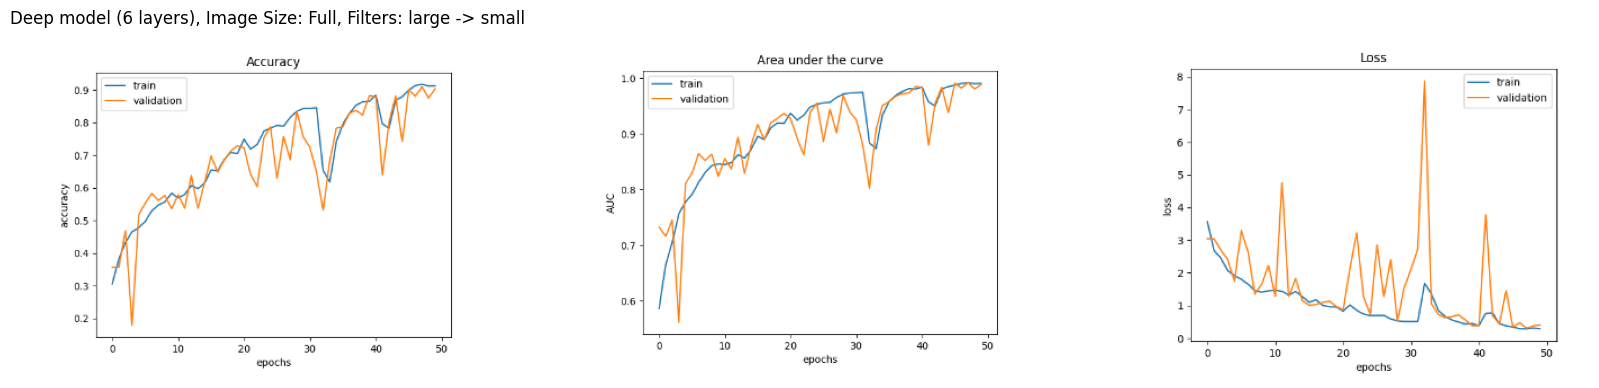

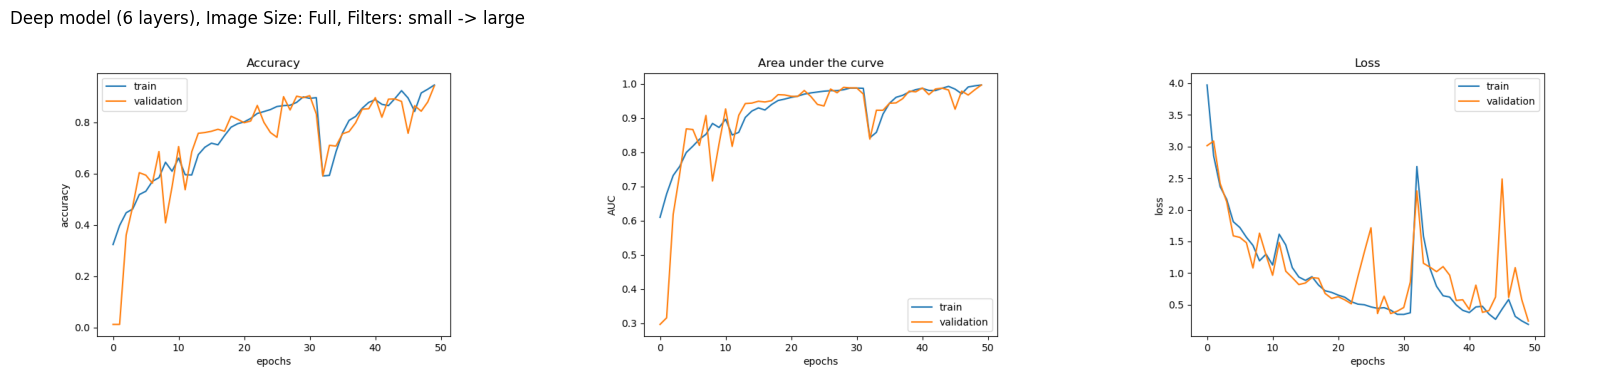

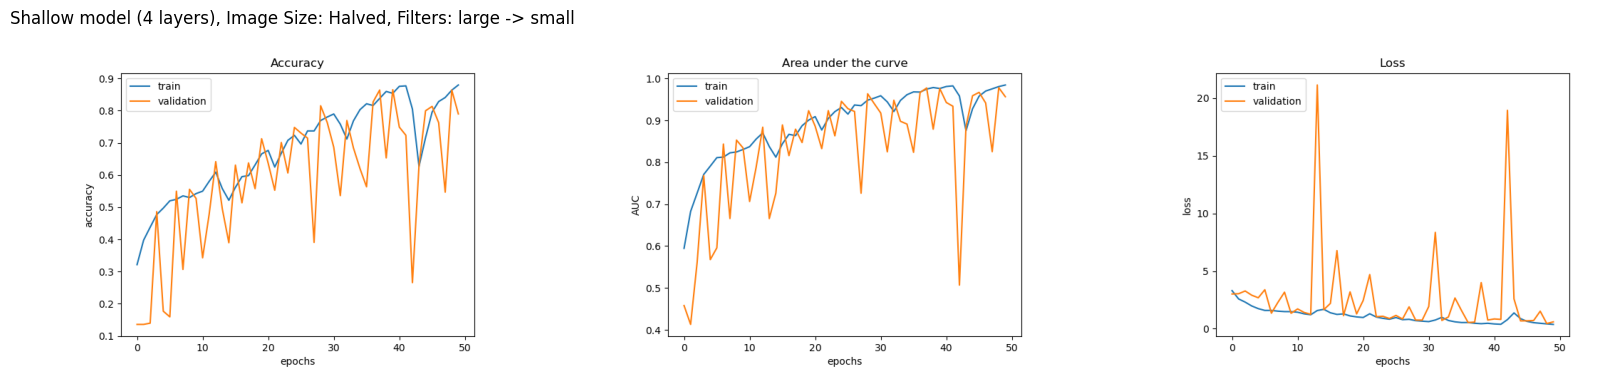

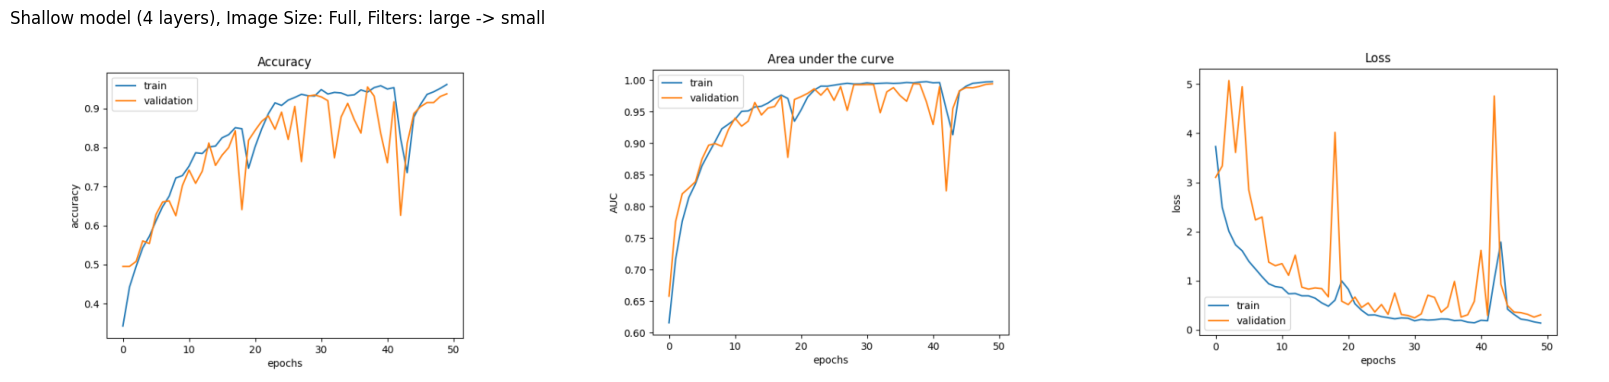

In [ ]:
# Show plots of how these models performed during training.
#  For example, plot train loss and train accuracy (or other evaluation metric) on the y-axis,
#  with number of iterations or number of examples on the x-axis.

def display_img(image_name, title):
    
    path = "/Users/ellie/OneDrive - Johns Hopkins/ML Final Results/" + image_name 
    plt.figure(figsize = (20,15))
    plt.subplot(1,3,1)
    plt.imshow(imread(path + '_acc.png')) #acc graph
    plt.axis("off")

    plt.title(title)
    plt.subplot(1,3,2)
    plt.imshow(imread(path + '_auc.png')) #AUC graph
    plt.axis("off")
    
    plt.subplot(1,3,3)
    plt.imshow(imread(path + '_loss.png')) #auc
    plt.axis("off")

display_img("1a", "Deep model (6 layers), Image Size: Full, Filters: large -> small")

display_img("1b", "Deep model (6 layers), Image Size: Full, Filters: small -> large")

display_img("2", "Shallow model (4 layers), Image Size: Halved, Filters: large -> small")

display_img("4", "Shallow model (4 layers), Image Size: Full, Filters: large -> small")


## Results

**Show tables comparing your methods to the baselines.**

|     |Our Model*| Sabbagh et al. | Fu’adah et al. |
| --- | --- | --- | --- |
| **Accuracy** | 69.19% | 77% | 95%|
| **Recall score**|   0.6826 | not available | 0.955|

*here the data is from our best model result

The Fu'adah et al. paper used the established AlexNet structure as their model, so the difference between our metrics is likely a result of our CNN's differences with AlexNet.

**What about these results surprised you? Why?**

We were surprised by the accuracy difference between the RGB encoded images and the grayscale images. We thought since they were representing basically the same thing, they should perform pretty much the same when inputted into the model, but in reality, the RGB encoded images did better when the model was trained with them rather than the grayscale images.

We were also surprised that setting our filter sizes for the convolutional layer to be going from large to small was an improvement (although slight) from small to large because we thought the justification we had come up with for our structure (described in the Methods - which methods were easy/difficult... section) was reasonable, but in reality, the new recommendation we got improved our scores on our evaluation metrics.

**Did your models over- or under-fit? How can you tell? What did you do to address these issues?**

We found that our model overfit somewhat because our train accuracy was decently higher than our test accuracy. We tried to address this by adding dropout layers/changing the dropout ratio, but it still resulted in some overfitting. It could be the case that we didn't find a good ratio/number of layers to use, but confirming this would require further testing. We did find that without dropout, the model severely overfit, which is why we made sure to keep our implementation of dropout layers.

**What does the evaluation of your trained models tell you about your data? How do you expect these models might behave differently on different data?**  

The evaluation of our models tells us that a deeper CNN is able to predict better what level of dementia a patient has based on their MRI scan data. We reason this is because there are more layers which can identify more features and relationships between features, and thus have more information about what parts of the MRI scan determine the dementia severity.
The evaluation also showed us that our data did have learnable features, since the model was able to correcly predict dementia severity for nearly 70% of the test set. 

The model will likely still work for different image data; however, it would need to be re-trained using image data similar to that dataset. In addition, some hyperparameters such as filter size may also need to be tuned based on what the input is, and the preprocessing steps might be different. However, the model should ultimately work for other image classification as it is just learning the features it finds in the training set.


**Accuracy**

|     |Test Accuracy|Train Accuracy| Validation Accuracy|
| --- | --- | --- | --- |
| **Deep model (6 layers), Image Size: Full, Filters: large -> small** | 0.6989 |0.9131| 0.9043|
| **Deep model (6 layers), Image Size: Full, Filters: small -> large**|   0.6857  | 0.9448 |  0.9414 |
| **Shallow model (4 layers), Image Size: Halved, Filters: large -> small**|   0.5629  | 0.8799  | 0.7900 |
| **Shallow model (4 layers), Image Size: Full, Filters: large -> small**|  0.6419  | 0.9614  |  0.9375 |

**AUC**

|     |Test AUC|Train AUC| Validation AUC|
| --- | --- | --- | --- |
| **Deep model (6 layers), Image Size: Full, Filters: large -> small** | 0.8833|0.9906 | 0.9885|
| **Deep model (6 layers), Image Size: Full, Filters: small -> large**|   0.8919  | 0.9843 |0.9564|
| **Shallow model (4 layers), Image Size: Halved, Filters: large -> small**|   0.8370  | 0.9843 | 0.9564|
| **Shallow model (4 layers), Image Size: Full, Filters: large -> small**|   0.8483 |  0.9975 |0.9941|


**Loss** 

|     |Test Loss|Train Loss| Validation Loss|
| --- | --- | --- | --- |
| **Deep model (6 layers), Image Size: Full, Filters: large -> small** | 3.3282 | 0.2879 | 0.4111|
| **Deep model (6 layers), Image Size: Full, Filters: small -> large**|   3.0732|0.1899 | 0.2426|
| **Shallow model (4 layers), Image Size: Halved, Filters: large -> small** |  3.1894 | 0.3743 |0.5947 |
| **Shallow model (4 layers), Image Size: Full, Filters: large -> small**|   7.6435  |  0.1392|  0.3068 |


**Recall** 

|     |Test Recall|Train Recall| Validation Recall|
| --- | --- | --- | --- |
| **Deep model (6 layers), Image Size: Full, Filters: large -> small** | 0.6826 | 0.9092| 0.9023|
| **Deep model (6 layers), Image Size: Full, Filters: small -> large**|   0.6802 | 0.9417| 0.9404|
| **Shallow model (4 layers), Image Size: Halved, Filters: large -> small** |   0.5434| 0.8723 | 0.7822| 
| **Shallow model (4 layers), Image Size: Full, Filters: large -> small**| 0.6388 | 0.9597  | 0.9375|


The below cell outputs plots of train vs. validation vs. test set accuracy, area under the curve, loss, and recall for four different configurations of our model: a deep (6-hidden-layer) CNN with filter sizes starting large and becoming smaller, a deep (6-hidden-layer) CNN with filter sizes starting small and becoming larger, a shallow (4-hidden layer) CNN with input image sizes halved and filter sizes starting large and becoming smaller, and a shallow (4-hidden layer) CNN with input image sizes the same as the original input and filter sizes starting large and becoming smaller.

We kept our final model as a 6-hidden-layer CNN with filter sizes starting large and becoming smaller, as this model had the highest test accuracy and test recall.

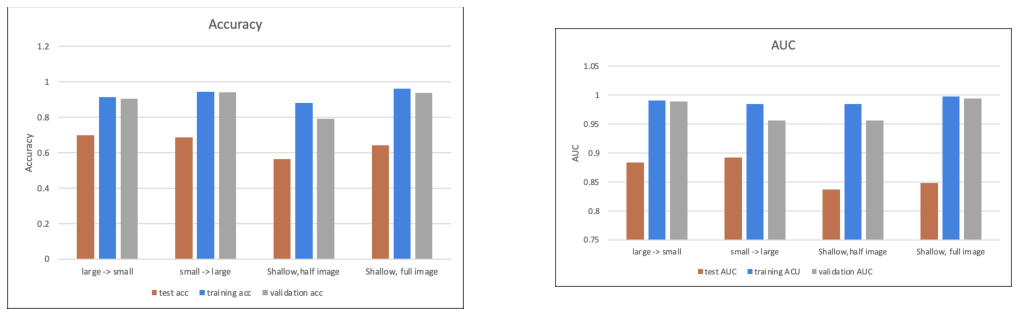

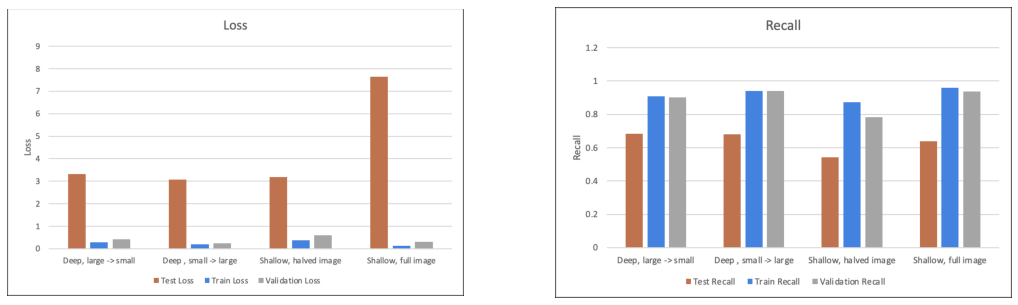

In [16]:
# Show plots or visualizations of your evaluation metric(s) on the train and test sets.
#   What do these plots show about over- or under-fitting?
#   You may borrow from how we visualized results in the Lab homeworks.
#   Are there aspects of your results that are difficult to visualize? Why? --> answered below

import matplotlib.pyplot as plt
import cv2

plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
plt.imshow(cv2.imread('accuracy_train_test.png'))
plt.axis("off");

plt.subplot(1,2,2)
plt.imshow(cv2.imread('auc_train_test.png'))
plt.axis("off");

plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
plt.imshow(cv2.imread('loss_train_test.png'))
plt.axis("off");

plt.subplot(1,2,2)
plt.imshow(cv2.imread('recall_train_test.png'))
plt.axis("off");

**Are there aspects of your results that are difficult to visualize? Why?**

The metrics we chose for evaluation are not difficult to visualize, as they are just numbers outputted after the model runs. However, some other aspects of the model that would be useful for interpretability and evaluation could be what features of the images the model actually prioritized. These would be more complicated to visualize and would require something like the LIME explainer (a tool that highlights the region of an image that was most important/determined its classification) to show which parts/features of the images are useful for the prediction.

# Discussion 

## What you've learned

*Note: you don't have to answer all of these, and you can answer other questions if you'd like. We just want you to demonstrate what you've learned from the project.*

**What concepts from lecture/breakout were most relevant to your project? How so?**
The concepts from lecture that were most relevant to our project were the deep learning neural network concepts involving image classification and processing problems. From lecture, we saw problems involving identifying/classifying differnet arabic numerals and animals using neural networks, and we applied similar concepts to our image classification project. Specifically, we used what we learned about convolutional neural networks to build our model. We also included concepts such as cross entropy loss, MaxPooling, Adam optimization, and batch normalization.


**What aspects of your project did you find most surprising?**
We found the fact that changing the preprocessing function's "color_mode" parameter from "rgb" to "grayscale" actually did affect the model's performance. Since the image data we were using already appeared to be in grayscale, we believed that changing the input color channels from 3 to 1 would have the benefit of increasing the training efficiency without costing any model performance. However, it appeared there was a slight decrease in model performance from RGB to grayscale.

**What lessons did you take from this project that you want to remember for the next ML project you work on? Do you think those lessons would transfer to other datasets and/or models? Why or why not?**
From this project we learned that there are a lot of different types of python packages that are very helpful when trying to implement a model, and it is important to understand which one fits best based on the application. We also learned that it is difficult to develop an optimal network structure from scratch, as comparing our model's performance to that of past work on similar MRI datasets (95% accuracy), our accuracy was much lower. However, by implementing our own structure we had a better understanding of how to implement a CNN (Fu’adah et al).

**What was the most helpful feedback you received during your presentation? Why?**
The most helpful feedback our team received during our presentation was about using weighted cross entropy as our loss function instead of just normal cross entropy due to the unbalanced nature of our dataset.

**If you had two more weeks to work on this project, what would you do next? Why?**
With more time to work on this project, we would have liked to implement more data augmentation and prepocessing methods. For example, we were thinking about adding rotated and zoomed in images to train the model on non-perfect MRI images and see how it will affect the model's performance. By doing this our model could improve its performance on a more varied dataset and be robust to small changes in data.

# References


Ana de Barros, P. D. (2017, December 8). UCLA study predicts 15 million in US will have alzheimer's by 2060. Alzheimer's News Today. Retrieved December 13, 2022, from https://alzheimersnewstoday.com/news/ucla-study-predicts-15-million-americans-alzheimers-disease-2060/ 

Fu’adah, Y & Wijayanto, Inung & Pratiwi, Nor & Taliningsih, F & Rizal, Syamsul & Pramudito,
Adnan. (2021). Automated Classification of Alzheimer’s Disease Based on MRI Image
Processing using Convolutional Neural Network (CNN) with AlexNet Architecture. Journal
of Physics: Conference Series. 1844. 012020. 10.1088/1742-6596/1844/1/012020.

Sabbagh, M. N., Lue, L. F., Fayard, D., & Shi, J. (2017). Increasing Precision of Clinical Diagnosis 
of Alzheimer's Disease Using a Combined Algorithm Incorporating Clinical and Novel
Biomarker Data. Neurology and therapy, 6(Suppl 1), 83–95.
https://doi.org/10.1007/s40120-017-0069-5

S. Dubey, “Alzheimer’s Dataset ( 4 class of Images).” Accessed: Nov. 01, 2022. [Online]. Available: https://www.kaggle.com/datasets/tourist55/alzheimers-dataset-4-class-of-images

Packages: numpy, pandas, matplotlib, tensorflow

